In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report


%matplotlib inline

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
mnist

   0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
        pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
 0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
 1          0.0  ...       0.0       0.0       0.0       0.0       0.0   
 2  

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
mnist.target.shape

(70000,)

In [6]:
mnist.DESCR

"The MNIST database of handwritten digits with 784 features. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.  \n\nWith some classification methods (particularly template-based methods, such as SV

In [7]:
print(mnist.target)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [8]:
print(mnist.target[0])

5


In [13]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2,shuffle=False)

In [14]:
from sklearn import svm
svm_classifier = svm.SVC(gamma=0.001, kernel='poly')
svm_classifier.fit(X_train, y_train)

SVC(gamma=0.001, kernel='poly')

In [15]:
predicted = svm_classifier.predict(X_test)

In [16]:
print("\nClassification report for classifier %s:\n%s\n" % (svm_classifier, metrics.classification_report(y_test, predicted)))
print("\nAccuracy of the Algorithm: ", svm_classifier.score(X_test, y_test))
plt.show()


Classification report for classifier SVC(gamma=0.001, kernel='poly'):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1373
           1       0.98      0.99      0.99      1569
           2       0.98      0.98      0.98      1430
           3       0.97      0.98      0.98      1413
           4       0.98      0.98      0.98      1376
           5       0.98      0.97      0.98      1253
           6       0.98      0.98      0.98      1339
           7       0.98      0.98      0.98      1483
           8       0.98      0.98      0.98      1365
           9       0.98      0.97      0.98      1399

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



Accuracy of the Algorithm:  0.9805



Confusion matrix:
[[1360    0    3    2    0    2    1    1    3    1]
 [   0 1557    2    2    0    0    3    1    4    0]
 [   9    2 1395    0    2    0    5   11    6    0]
 [   0    2    1 1386    1    5    0    4   10    4]
 [   3    3    1    0 1352    0    3    3    0   11]
 [   3    0    3   14    1 1215    6    1    5    5]
 [   5    5    1    0    3    5 1318    0    2    0]
 [   1   11    8    3    2    0    0 1452    0    6]
 [   5    2    1    6    5    5    3    3 1333    2]
 [   2    6    2   10    9    6    1    1    3 1359]]


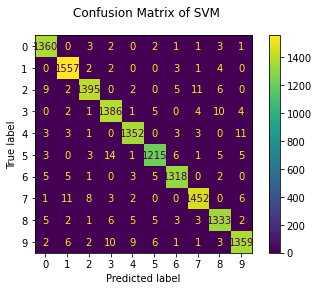

In [17]:
disp = metrics.plot_confusion_matrix(svm_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix of SVM")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
plt.show()